In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
'''Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет 
на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, 
находящихся в группе риска.'''

'Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет \nна их успеваемость по математике, чтобы на ранней стадии выявлять студентов, \nнаходящихся в группе риска.'

In [3]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('C:/Users/Sergei/Downloads/stud_math.csv')

In [4]:
def get_stat_dif(df, column): # найти статистически значимые различия
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                        df.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

def get_boxplot(df, column): # нарисовать boxplot-ы
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def find_IQR(Q1,Q3):
    if Q1 > Q3:
        return Q1-Q3
    else:
        return Q3-Q1

def find_outliers(df,column):
    Q1 = df[column].quantile(q=0.25, interpolation='midpoint')
    Q3 = df[column].quantile(q=0.75, interpolation='midpoint')
    IQR = abs(find_IQR(Q1,Q3))
    if Q1 < Q3:
        V1 = Q1 - 1.5*IQR
        V2 = Q3 + 1.5*IQR
        return df[(df[column] < V1) | (df[column] > V2)][column]
    else:
        V1 = Q1 + 1.5*IQR
        V2 = Q3 - 1.5*IQR
        return df[(df[column] > V1) | df[column] < V2][column]

def Gedu_add(row):
    if row.guardian == 'mother':
        return row['Medu']
    elif row.guardian == 'father':
        return row['Fedu']
    else:
        return None

In [5]:
'''
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике
'''

"\n1 school — аббревиатура школы, в которой учится ученик\n\n2 sex — пол ученика ('F' - женский, 'M' - мужской)\n\n3 age — возраст ученика (от 15 до 22)\n\n4 address — тип адреса ученика ('U' - городской, 'R' - за городом)\n\n5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)\n\n6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\n\n7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n\n8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n\n9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n\n10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n\n11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'c

In [6]:
stud.columns
# создадим список с колонками, в которых будут удалены выбросы

outliers = []

In [7]:
# убираем лишнюю колонку
stud.drop(['studytime, granular'], axis=1, inplace=True)

In [8]:
# добавляем новую - Guardian education. Т.к. образование матерей больше влияло на оценку, 
# чем образование отцов
# и в то же время матери чаще являются опекунами, решил проверить как будет коррелировать образование
# "бесполого" опекуна
# stud['Gedu'] = stud.apply(lambda row: Gedu_add(row), axis=1)
# это ни к чему не привело, но на дальнейшие таблицы эта колонка влияла, так что просто закомментирую
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

GP    349
MS     46
Name: school, dtype: int64


<AxesSubplot:>

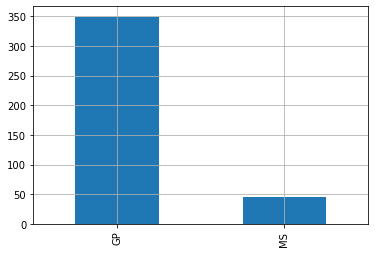

In [9]:
print(stud.school.value_counts())
stud.school.value_counts().plot(kind='bar',grid='true')
# пустых значений нет

F    208
M    187
Name: sex, dtype: int64


<AxesSubplot:>

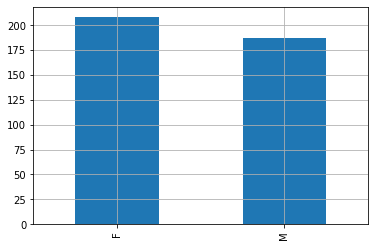

In [10]:
print(stud.sex.value_counts())
(stud.sex.value_counts().plot(kind='bar',grid='true'))
# пустых значений нет

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
247    22
Name: age, dtype: int64
247    22
Name: age, dtype: int64


count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

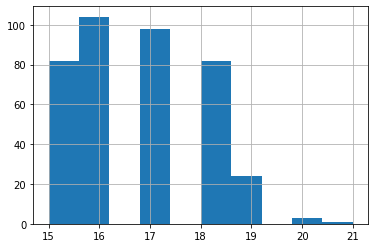

In [11]:
print(stud.age.value_counts())
# пустых значений нет
# есть несколько возрастных учеников - проверим на выбросы

age_Q1 = stud.age.quantile(q=0.25, interpolation='midpoint')
age_Q3 = stud.age.quantile(q=0.75, interpolation='midpoint')
age_IQR = age_Q3 - age_Q1
age_outliers = stud[(stud.age < (age_Q1 - age_IQR*1.5)) | 
                    (stud.age > (age_Q3 + age_IQR*1.5))].age
print(age_outliers)
# 1 выброс - 22-летний ученик

# вернулся снизу, чтобы проверить функцию:
print(find_outliers(stud,'age'))

# устраняем выбросы
stud_age = stud.copy()
stud_age.age.value_counts()
stud_age = stud_age[stud_age.age < 22]
# создаём и добавляем в список колонок с выбросами для удобства, будем использовать их для анализа в будущем
outliers.append('stud_age')
stud_age.age.hist()
stud_age.age.describe()


U      295
R       83
NaN     17
Name: address, dtype: int64


<AxesSubplot:>

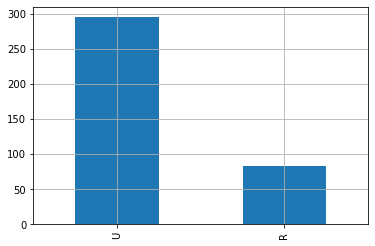

In [12]:
print(stud.address.value_counts(dropna=False))
stud.address.value_counts().plot(kind='bar', grid='true')
# в основном (74.7%) городские жители, 17 пустых значений

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64


<AxesSubplot:>

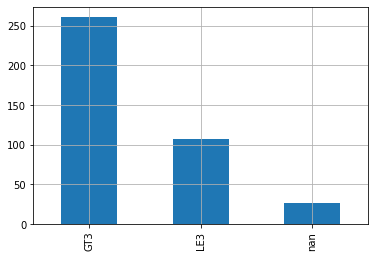

In [13]:
print(stud.famsize.value_counts(dropna=False))
stud.famsize.value_counts(dropna=False).plot(kind='bar', grid='true')

# видим, что у большинства (66%) учеников семья состоит из более чем 3 человек, 27 пустых значений

In [14]:
print(stud.Pstatus.value_counts(dropna=False, normalize=True))
# 45(11%) пустых значений, у 79% учеников родители живут вместе, у 9% отдельно
# данные не являются надёжными - пропущено 11% значений

T      0.794937
NaN    0.113924
A      0.091139
Name: Pstatus, dtype: float64


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Series([], Name: Medu, dtype: float64)


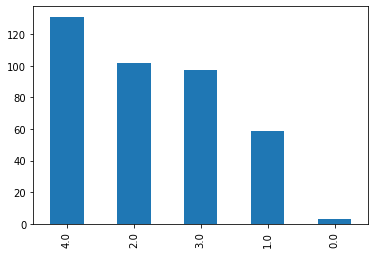

In [15]:
stud.Medu.value_counts().plot(kind='bar')
print(stud.Medu.describe())
# пропущено 3 значения, можно пользоваться
# видим, что в среднем у матерей среднее специальное или 11 классов образования
# т.к разброс от 0 до 4, предположу, что выбросов нет (IQR=4-2=2, 2-2*1.5 ~ <0, 2+2*1.5 ~ >4)
# в дополнительной проверке нет необходимости

# вернулся для проверки функции:
print(find_outliers(stud, 'Medu'))
# действительно, выбросов нет

11     40.0
76      0.0
171     0.0
Name: Fedu, dtype: float64
count    368.000000
mean       2.527174
std        1.074511
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


<AxesSubplot:>

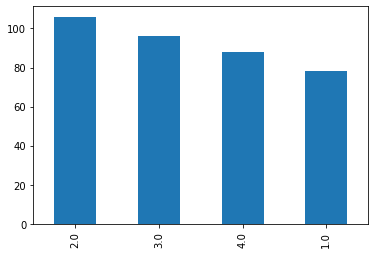

In [16]:
#stud.Fedu.value_counts(dropna=False)
# 6% пустых значений, 1 ошибка в данных (можно предположить, что хотели написать 4, а написали 40),
# но точно знать мы не можем
# проверяем и устраняем выбросы
print(find_outliers(stud, 'Fedu'))
stud_Fedu = stud.copy()
stud_Fedu = stud_Fedu[(stud_Fedu.Fedu < 40) & (stud_Fedu.Fedu > 0)]
outliers.append('stud_Fedu')
print(stud_Fedu.Fedu.describe())
stud_Fedu.Fedu.value_counts(dropna=False)
stud_Fedu.Fedu.value_counts().plot(kind='bar')

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

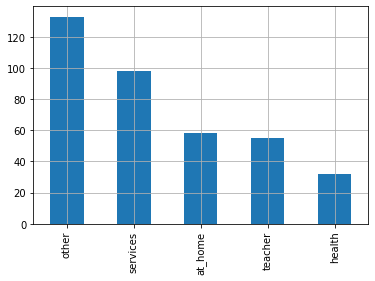

In [17]:
print(stud.Mjob.value_counts(dropna=False))
# менее 5% процентов пустых значений, несущественно
stud.Mjob.value_counts().plot(kind='bar', grid=True)
stud.Mjob.describe()

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

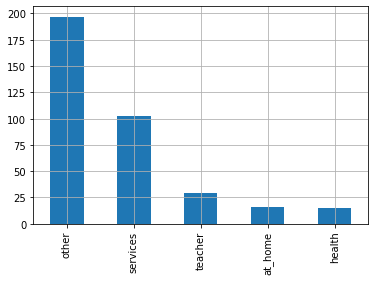

In [18]:
print(stud.Fjob.value_counts(dropna=False))
# 9% пропущенных значений
stud.Fjob.value_counts().plot(kind='bar', grid=True)
stud.Fjob.describe()

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64


<AxesSubplot:>

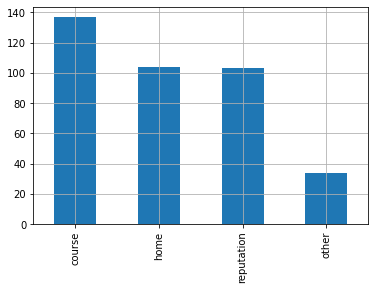

In [19]:
print(stud.reason.value_counts(dropna=False))
# менее 5% пропущенных значений
stud.reason.value_counts().plot(kind='bar', grid=True)
# большинство выбирает школу из-за образовательной программы

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64


<AxesSubplot:>

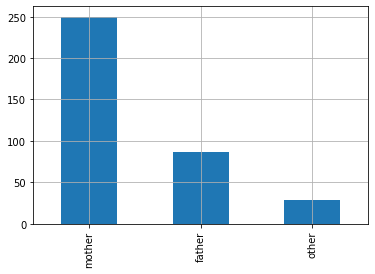

In [20]:
print(stud.guardian.value_counts(dropna=False))
# 7.8% пропущенных значений, в 63% случаях опекун - мать
stud.guardian.value_counts().plot(kind='bar', grid=True)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
61     4.0
108    4.0
149    4.0
164    4.0
228    4.0
327    4.0
375    4.0
Name: traveltime, dtype: float64


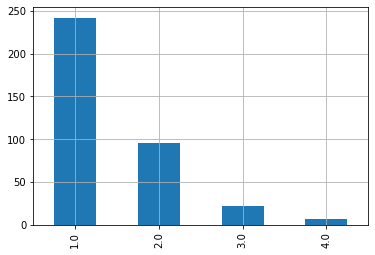

In [21]:
# время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
print(stud.traveltime.value_counts(dropna=False))
print(stud.traveltime.describe())
# 7% пропущенных значений, большинство добирается до школы менее чем за 15 мин
# видно, что присутствуют выбросы, проверим:
traveltime_Q1 = stud.traveltime.quantile(q=0.25, interpolation='midpoint')
traveltime_Q3 = stud.traveltime.quantile(q=0.75, interpolation='midpoint')

traveltime_V1 = traveltime_Q1-1.5*(traveltime_Q3-traveltime_Q1)
traveltime_V2 = traveltime_Q3+1.5*(traveltime_Q3-traveltime_Q1)
ind = np.where((stud.traveltime > traveltime_V2) | (stud.traveltime < traveltime_V1))
# print(stud.traveltime.loc[ind])

# или:
# print(stud[(stud.traveltime < traveltime_V1) | (stud.traveltime > traveltime_V2)].traveltime)

# а ещё решил всё-таки написать функцию:
print(find_outliers(stud,'traveltime'))
stud.traveltime.value_counts().plot(kind='bar', grid=True)
# убираем выбросы
stud_traveltime = stud.copy()
stud_traveltime = stud_traveltime[stud_traveltime.traveltime < 4]
outliers.append('stud_traveltime')


2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64
47     4.0
66     4.0
67     4.0
69     4.0
70     4.0
71     4.0
76     4.0
77     4.0
94     4.0
95     4.0
105    4.0
106    4.0
108    4.0
121    4.0
140    4.0
204    4.0
210    4.0
256    4.0
259    4.0
271    4.0
282    4.0
293    4.0
298    4.0
303    4.0
330    4.0
334    4.0
338    4.0
Name: studytime, dtype: float64
count    361.000000
mean       1.891967
std        0.672447
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64


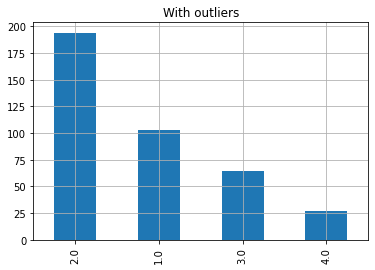

<AxesSubplot:title={'center':'Without outliers'}>

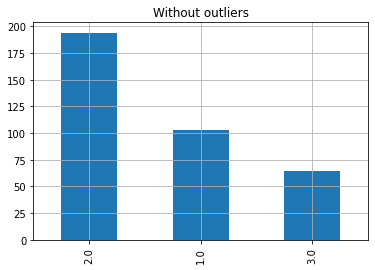

In [22]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
print(stud.studytime.value_counts(dropna=False))
# менее 2% NaN
stud.studytime.describe()
# большинство тратит на учёбу 2-2.5 часа или менее 2 часов. Проверим выбросы
print(find_outliers(stud, 'studytime'))
# 27 выбросов, вместо среднего надо взять медиану - 2
# или убрать выбросы из статистики, если будет такая необходимость:
stud_studytime = stud.copy()
stud_studytime = stud_studytime[stud_studytime.studytime < 4]
outliers.append('stud_studytime')
print(stud_studytime.studytime.describe())

stud.studytime.value_counts().plot(kind='bar', grid=True, title='With outliers')
plt.show()
stud_studytime.studytime.value_counts().plot(kind='bar', grid=True, title='Without outliers')

In [23]:
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
print(stud.failures.value_counts(dropna=False, normalize=True))
# 5.6% NaN
print(stud.failures.describe())
print(find_outliers(stud,'failures'))
# выбросов не обнаружено


0.0    0.741772
1.0    0.124051
NaN    0.055696
2.0    0.040506
3.0    0.037975
Name: failures, dtype: float64
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Series([], Name: failures, dtype: float64)


In [24]:
'''16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)'''

print(pd.DataFrame(stud.schoolsup.value_counts(dropna=False,)))
print(pd.DataFrame(stud.famsup.value_counts(dropna=False)))
print(pd.DataFrame(stud.paid.value_counts(dropna=False)))
print(pd.DataFrame(stud.activities.value_counts(dropna=False)))
print(pd.DataFrame(stud.nursery.value_counts(dropna=False)))
print(pd.DataFrame(stud.higher.value_counts(dropna=False)))
print(pd.DataFrame(stud.internet.value_counts(dropna=False)))
print(pd.DataFrame(stud.romantic.value_counts(dropna=False)))
# Все NaN менее 10% (максимум 9.8%)


     schoolsup
no         335
yes         51
NaN          9
     famsup
yes     219
no      137
NaN      39
     paid
no    200
yes   155
NaN    40
     activities
yes         195
no          186
NaN          14
     nursery
yes      300
no        79
NaN       16
     higher
yes     356
NaN      20
no       19
     internet
yes       305
no         56
NaN        34
     romantic
no        240
yes       124
NaN        31


Выбросы:
 27    2.0
37    2.0
46    2.0
60    2.0
66    1.0
Name: famrel, dtype: float64
count    343.000000
mean       4.107872
std        0.677562
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


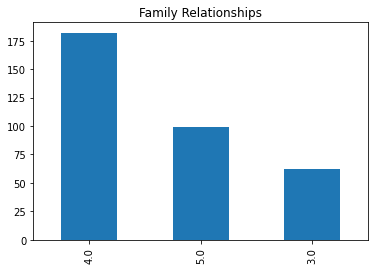

7     1.0
19    1.0
68    1.0
89    1.0
95    1.0
Name: freetime, dtype: float64
count    366.000000
mean       3.341530
std        0.882569
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


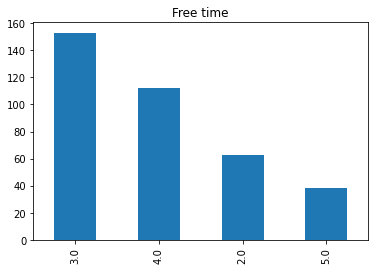

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Series([], Name: goout, dtype: float64)


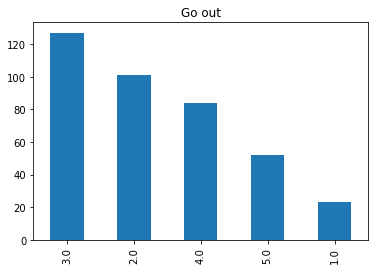

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Series([], Name: health, dtype: float64)


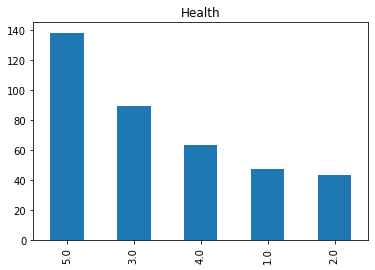

In [25]:
'''24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)'''


stud.famrel.value_counts(dropna=False)
# 6.8% значений NaN
stud_famrel = stud.copy()
stud_famrel = stud_famrel[stud_famrel.famrel > 0]
print("Выбросы:\n", find_outliers(stud_famrel,'famrel').head())
# одно некорректное значение, 1 и 2 - выбросы, устраняем
stud_famrel = stud_famrel[stud_famrel.famrel > 2]
outliers.append('stud_famrel')

print(stud_famrel.famrel.describe())
stud_famrel.famrel.value_counts().plot(kind='bar', title='Family Relationships')
plt.show()

stud.freetime.value_counts(dropna=False)
# 2.7% NaN
print(find_outliers(stud,'freetime').head())
# 1 являются выбросами, устраняем
stud_freetime = stud.copy()
stud_freetime = stud_freetime[stud_freetime.freetime > 1]
stud_freetime.freetime.value_counts().plot(kind='bar', title='Free time')
print(stud_freetime.freetime.describe())
outliers.append('stud_freetime')


plt.show()

stud.goout.value_counts(dropna=False)
# 2% NaN
stud.goout.value_counts().plot(kind='bar', title='Go out')
print(stud.goout.describe())
print(find_outliers(stud,'goout').head())
# выбросов нет
plt.show()

stud.health.value_counts(dropna=False)
# 3.7% NaN
stud.health.value_counts().plot(kind='bar', title='Health')
print(stud.health.describe())
print(find_outliers(stud,'health').head())
# выбросов нет
plt.show()

260     21.0
313     22.0
277     22.0
216     22.0
320     23.0
198     24.0
40      25.0
103     26.0
205     28.0
280     30.0
307     38.0
315     40.0
74      54.0
183     56.0
276     75.0
390    212.0
222    385.0
Name: absences, dtype: float64
17
260    21.0
216    22.0
277    22.0
313    22.0
320    23.0
198    24.0
40     25.0
103    26.0
205    28.0
280    30.0
307    38.0
315    40.0
74     54.0
183    56.0
276    75.0
Name: absences, dtype: float64
count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64


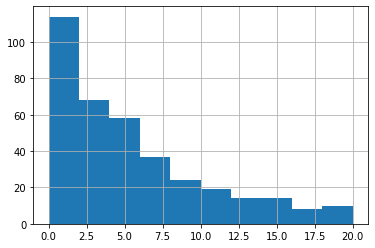

In [26]:
# 3% NaN
stud.absences.describe()
# mean = 7.28
# median = 4
print(find_outliers(stud,'absences').sort_values())
# 21 и более опазданий являются выбросами. Есть случаи с 385 и 212 опозданиями, что выглядит странно
print(stud[stud.absences > 20].absences.count())
# 17 человек из 383, 4.4%
# сначала уберём аномальные значение, и тогда уже посчитаем выбросы
stud_absences = stud.copy()
stud_absences = stud_absences[stud_absences.absences < 200]
print(find_outliers(stud_absences,'absences').sort_values())
# выбросы всё равно 21 и более, устраняем
stud_absences = stud_absences[stud_absences.absences < 21]
print(stud_absences.absences.describe())
# mean = 4.6, median = 4 - уже больше похоже на нормальное кол-во опозданий
stud_absences.absences.hist()
outliers.append('stud_absences')


<AxesSubplot:>

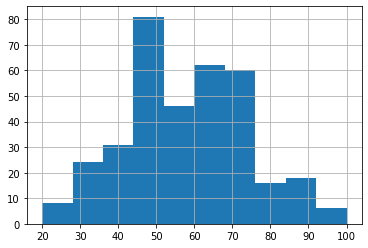

In [27]:
# создаём ДБ без выбросов и используем данные score с нормальным распределением (score>0)
stud_analysis = stud.copy()
stud_analysis.age = stud_age.age
stud_analysis.Fedu = stud_Fedu.Fedu
stud_analysis.traveltime = stud_traveltime.traveltime
stud_analysis.famrel = stud_famrel.famrel
stud_analysis.freetime = stud_freetime.freetime
stud_analysis.absences = stud_absences.absences
stud_analysis = stud_analysis[stud_analysis.score > 0]
stud_analysis.score.hist()


In [28]:
print(stud.score.describe())
stud.score.value_counts(dropna=False)
# 1.5% NaN
print(find_outliers(stud,'score'))
# выбросов нет, начиная с 20% идёт нормальное распределение, 37 учеников получили 0 баллов
# принял решение всё-таки убрать оценки 0 из статистики, т.к. для построения модели
# лучше подойдёт именно такой график
print(stud_analysis.score.describe())

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
Series([], Name: score, dtype: float64)
count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


In [29]:
outliers

['stud_age',
 'stud_Fedu',
 'stud_traveltime',
 'stud_studytime',
 'stud_famrel',
 'stud_freetime',
 'stud_absences']

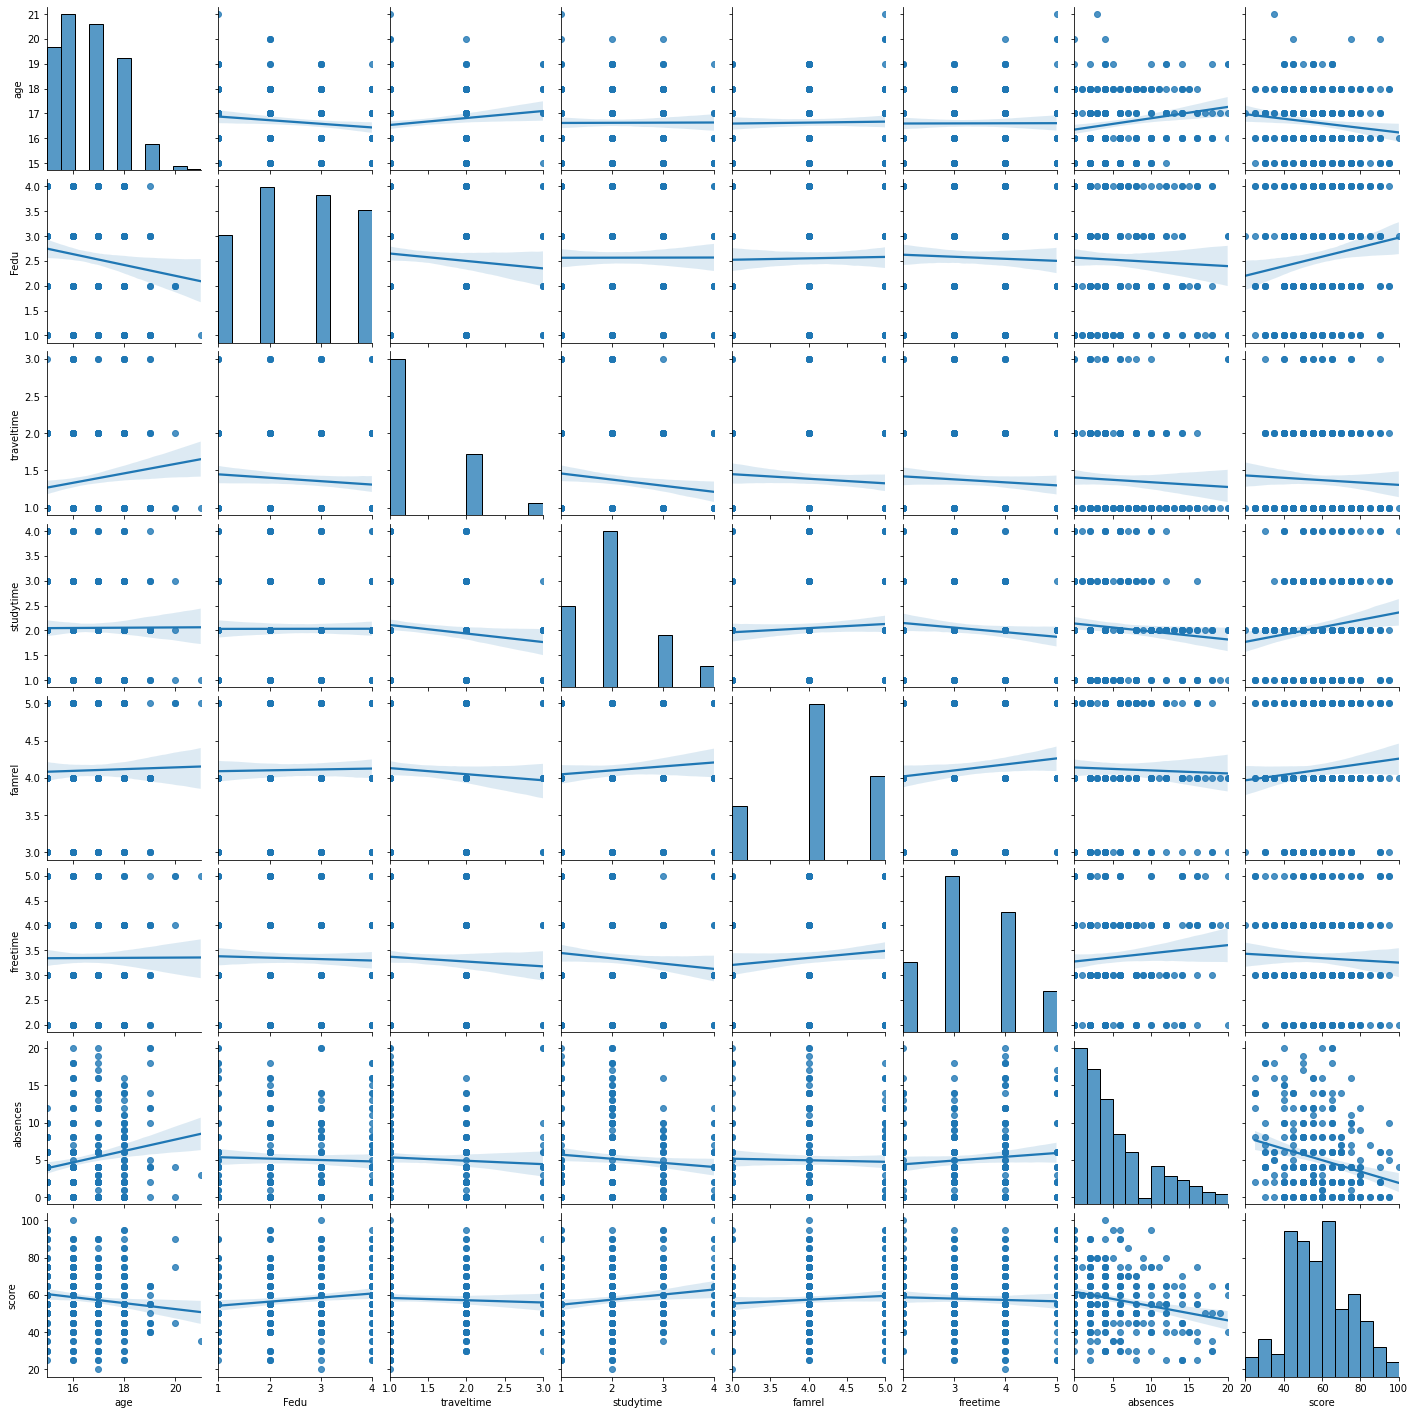

In [30]:
# корреляционный анализ, используем только числовые значения
stud_num1 = ['age', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'absences', 'score']

sns.pairplot(stud_analysis[stud_num1], kind='reg')
# тут мы заменяем колонки с устранёнными выбросами и смотрим что получилось
# разделю на 2 части, иначе не влезает

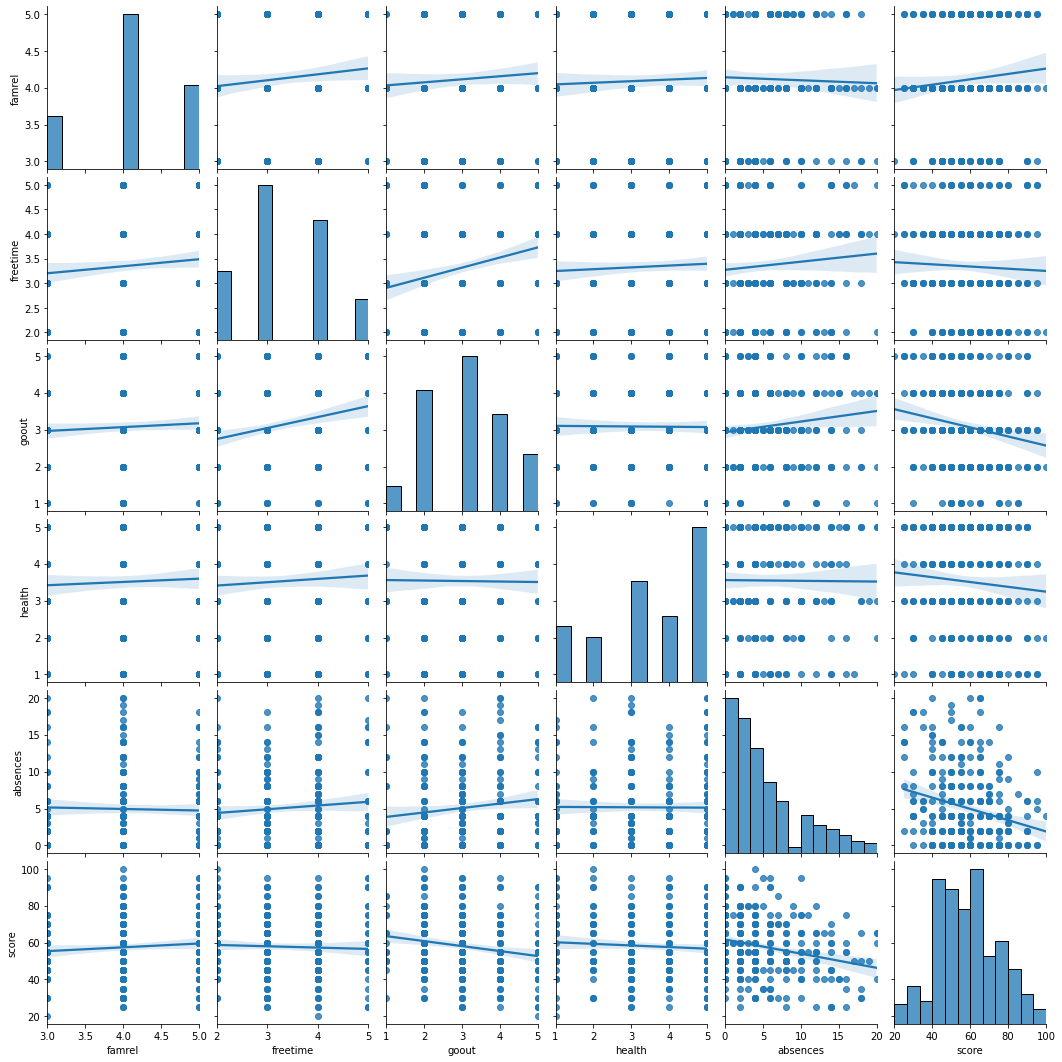

In [43]:
stud_num2 = ['famrel', 'freetime', 'goout', 'health', 'absences', 'score']
sns.pairplot(stud_analysis[stud_num2], kind='reg')

In [32]:
# убираем колонку, которая обратно коррелирует сo studytime
stud_analysis.corr()
# корреляция Gedu всё равно меньше, чем хотелось бы, попробуем вообще не учитывать other
# и тоже корреляция не превышает Medu - влияние матерей больше, чем просто влияние опекуна

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.128496,-0.126251,0.133692,0.004173,0.193357,0.021356,0.003401,0.105288,-0.034894,0.187220,-0.121579
Medu,-0.128496,1.000000,0.621917,-0.114500,0.070533,-0.205944,0.083938,0.018295,0.080556,-0.038050,0.034569,0.186477
Fedu,-0.126251,0.621917,1.000000,-0.082852,0.001263,-0.273576,0.018416,-0.034265,0.041421,0.001252,-0.040452,0.144600
traveltime,0.133692,-0.114500,-0.082852,1.000000,-0.119026,0.013079,-0.070936,-0.062416,-0.059417,-0.012250,-0.054113,-0.043990
studytime,0.004173,0.070533,0.001263,-0.119026,1.000000,-0.156406,0.066694,-0.099376,-0.029686,-0.085469,-0.094304,0.142055
failures,0.193357,-0.205944,-0.273576,0.013079,-0.156406,1.000000,0.053516,0.147141,0.126770,0.064083,0.172971,-0.289377
famrel,0.021356,0.083938,0.018416,-0.070936,0.066694,0.053516,1.000000,0.107121,0.065462,0.043864,-0.028951,0.086585
freetime,0.003401,0.018295,-0.034265,-0.062416,-0.099376,0.147141,0.107121,1.000000,0.247253,0.057836,0.091261,-0.040191
goout,0.105288,0.080556,0.041421,-0.059417,-0.029686,0.126770,0.065462,0.247253,1.000000,-0.010343,0.131236,-0.182286
health,-0.034894,-0.038050,0.001252,-0.012250,-0.085469,0.064083,0.043864,0.057836,-0.010343,1.000000,-0.007110,-0.075340


In [33]:
# и так. Мы видим, что набильшая положительная корреляция у:
# Medu, Fedu, studytime
# отрицательная корреляция:
# Failures, age, goout

In [34]:
# создадим датафрейм для корреляций, чтобы было удобнее определить что влияет на score больше всего
score_corr = pd.DataFrame(stud_analysis.corr()['score'].values, index=stud_analysis.corr()[
                             'score'].index, columns=['correlation'])
score_corr = score_corr.drop('score')
score_corr['R2'] = abs(score_corr.correlation) #интересуют абсолютные значения, вроде это называлось R2
# но, если честно, точно не помню
score_corr.sort_values(by='R2', ascending=False)

,correlation,R2
failures,-0.289377,0.289377
absences,-0.242220,0.242220
Medu,0.186477,0.186477
goout,-0.182286,0.182286
Fedu,0.144600,0.144600
studytime,0.142055,0.142055
age,-0.121579,0.121579
famrel,0.086585,0.086585
health,-0.075340,0.075340
traveltime,-0.043990,0.043990


In [35]:
# оставляем только данные с R2 выше 0.1, которые будут использованы для построения модели
score_corr = score_corr[score_corr.R2 > 0.1]
score_corr.sort_values(by='R2', ascending=False)

,correlation,R2
failures,-0.289377,0.289377
absences,-0.242220,0.242220
Medu,0.186477,0.186477
goout,-0.182286,0.182286
Fedu,0.144600,0.144600
studytime,0.142055,0.142055
age,-0.121579,0.121579


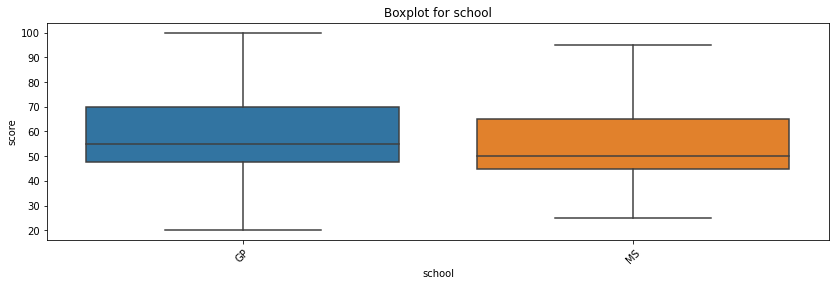

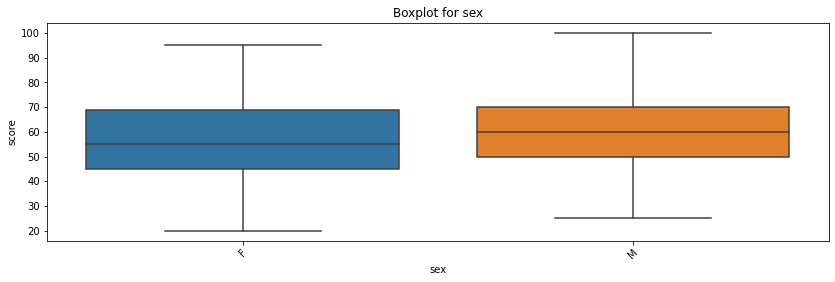

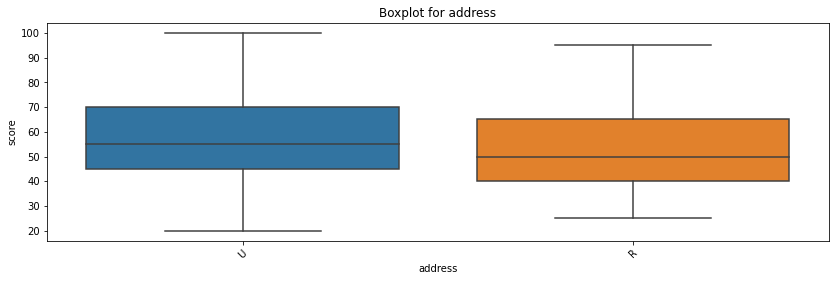

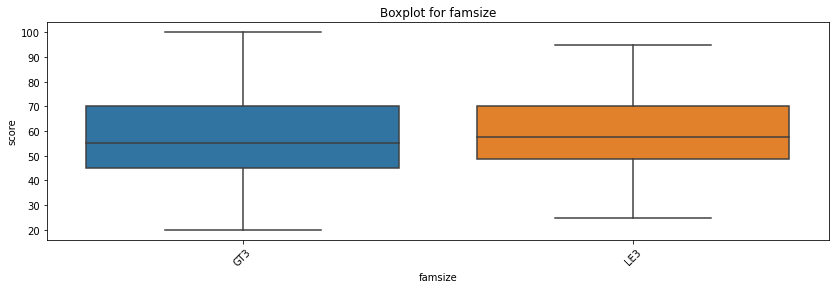

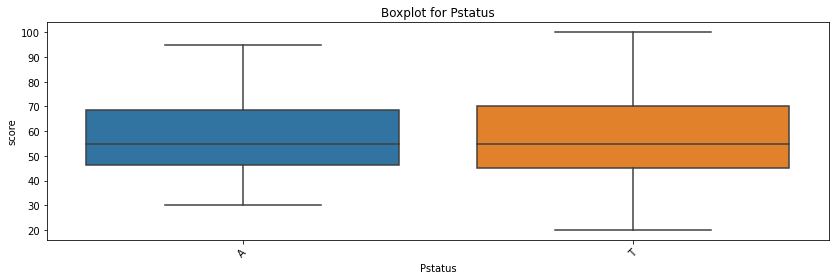

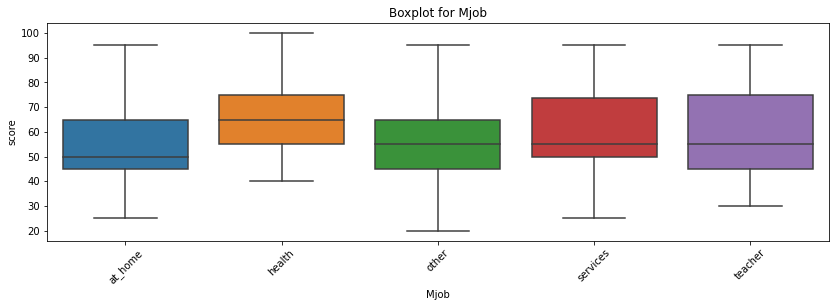

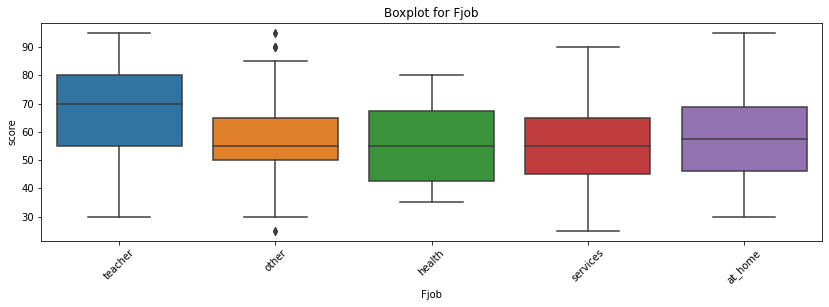

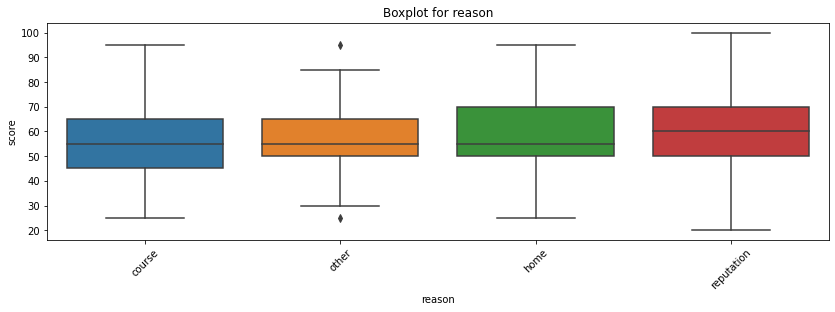

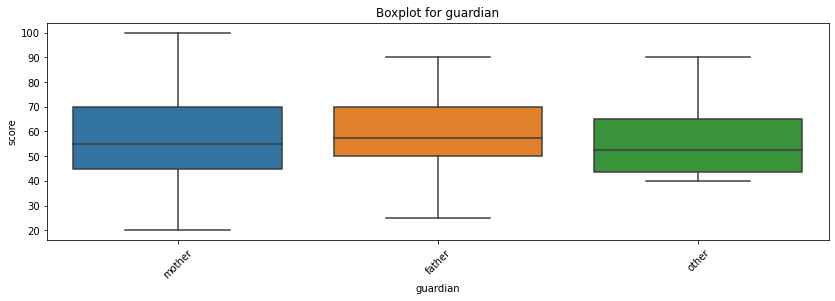

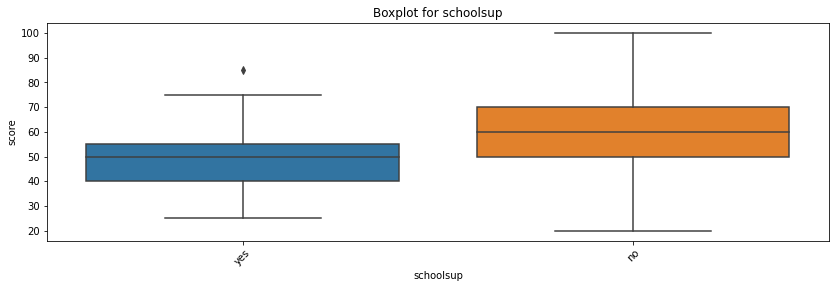

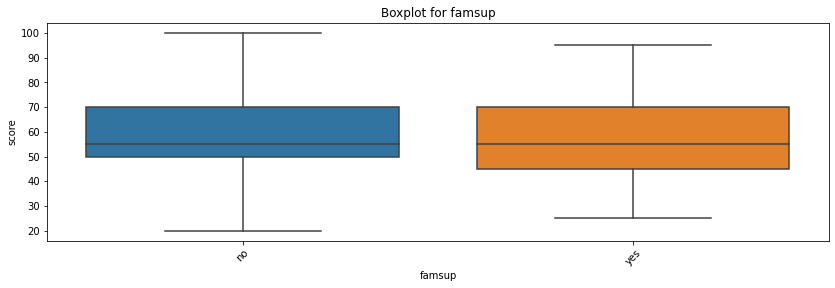

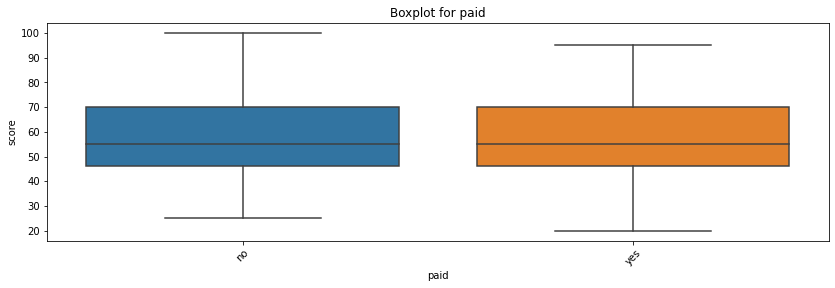

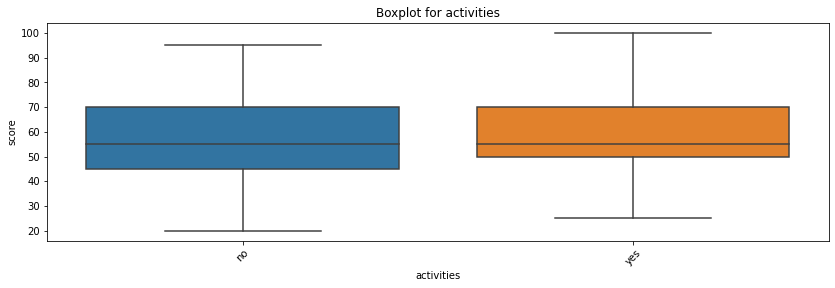

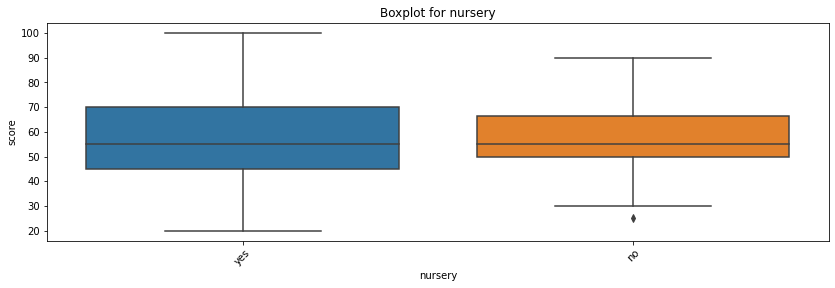

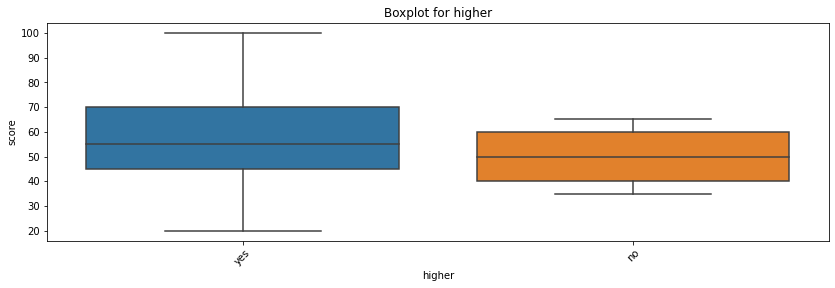

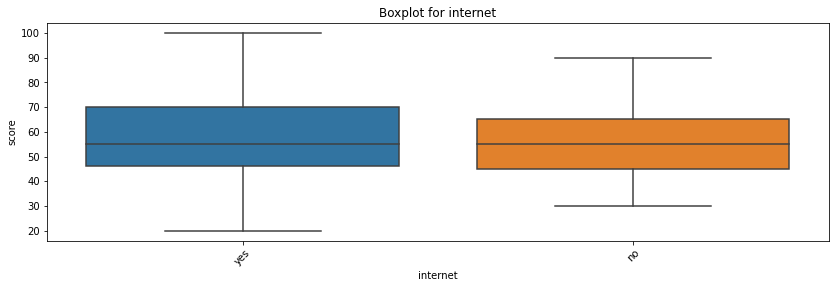

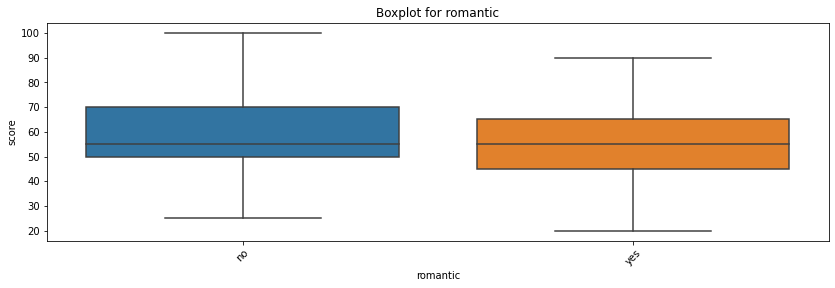

In [36]:
# Анализ номинативных переменных

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(stud_analysis, col)

In [37]:
# большинство параметров вроде как влияют на score
# Проверим тестом Стьюдента:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(stud, col)

Найдены статистически значимые различия для колонки Mjob


In [38]:
# хм, статистически значимые различия только для колонки Mjob..
# несмотря на то, что оценка score 0 не является выбросом, попробуем проверить без этих оценок

In [39]:
stud_analysis = stud_analysis[stud_analysis.score > 0]
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(stud_analysis, col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


In [40]:
# это уже больше похоже на правду. Т.к. нормальное распределение оценок начинается с 20 баллов,
# можем предположить,
# что оценка 0 получается если ученик не сдавал экзамен по не связанной с параметрами причиной

# Для построения модели рекомендуется использовать следующие параметры:
# address, Mjob, Fjob, schoolsup, failures, absences, Medu, goout, Fedu, studytime, age
stud_for_model = stud_analysis.loc[:, ['address', 'Mjob', 'Fjob', 'schoolsup', 'failures', 
                                       'absences', 'Medu', 'Fedu', 'goout', 'studytime', 
                                      'age']]
stud_for_model.head()

,address,Mjob,Fjob,schoolsup,failures,absences,Medu,Fedu,goout,studytime,age
0,U,at_home,teacher,yes,0.0,6.0,4.0,4.0,4.0,2.0,18.0
1,U,at_home,other,no,0.0,4.0,1.0,1.0,3.0,2.0,17.0
2,U,at_home,other,yes,3.0,10.0,1.0,1.0,2.0,2.0,15.0
3,U,health,NaN,no,0.0,2.0,4.0,2.0,2.0,3.0,15.0
4,U,other,other,no,0.0,4.0,3.0,3.0,2.0,2.0,16.0


In [41]:
# И так, выводы:
'''Данные достаточно чистые, почти все параметры кроме Pstatus(более 10% NaN) можно использовать.
   Выбросы обнаружены и устранены в следующих столбцах: ['stud_age', 'stud_Fedu','stud_traveltime',
'stud_studytime','stud_famrel','stud_freetime',
 'stud_absences']
   Наивысшая положительная корреляция: Medu, Fedu, studytime
   Наивысшая отрицательная корреляция: failures, absences, goout, age
   То есть больше всего влияют образование родителей и время, потраченное на учёбу
   А отрицательно влияют неудачи, опоздания/прогулы, проведённое время с друзьями и возраст
   
   Самые важные параметры, которые предлагается использовать для построения модели:
   address, Mjob, Fjob, schoolsup, failures, absences, Medu, goout, Fedu, studytime, age
 
'''

"Данные достаточно чистые, почти все параметры кроме Pstatus(более 10% NaN) можно использовать.\n   Выбросы обнаружены и устранены в следующих столбцах: ['stud_age', 'stud_Fedu','stud_traveltime',\n'stud_studytime','stud_famrel','stud_freetime',\n 'stud_absences']\n   Наивысшая положительная корреляция: Medu, Fedu, studytime\n   Наивысшая отрицательная корреляция: failures, absences, goout, age\n   То есть больше всего влияют образование родителей и время, потраченное на учёбу\n   А отрицательно влияют неудачи, опоздания/прогулы, проведённое время с друзьями и возраст\n   \n   Самые важные параметры, которые предлагается использовать для построения модели:\n   address, Mjob, Fjob, schoolsup, failures, absences, Medu, goout, Fedu, studytime, age\n \n"